**Questions related to data science interviews can be answered in this jupyter notebook:**
- Question 1. During which time range in a year, do we have the most amount of job interviews provided? 
   We can plan our job hunting time accordingly.
- Question 2. What are the top companies offering the largest number of job opportunities? Have they changed over the past several years?

- Question 3. Who has got the largest amount of data science job interviews?

In [20]:
import re
import time
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('interview_DS_US.csv', encoding='utf-8')

In [22]:
df.shape

(7598, 7)

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7598 entries, 0 to 7597
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        7594 non-null   datetime64[ns]
 1   Poster      6613 non-null   object        
 2   Replies     7598 non-null   int64         
 3   Views       7598 non-null   int64         
 4   post_id     7598 non-null   int64         
 5   post_title  7598 non-null   object        
 6   company     7065 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 326.5+ KB


In [25]:
df.head()

,Date,Poster,Replies,Views,post_id,post_title,company
0,2020-11-15,NaN,0,107,687935,斯伦贝谢 DS Intern,Schlumberger
1,2020-11-15,sinkinx,0,72,687913,JPMorgan OA原题 2021 Applied AI and Machine Lear...,JPMorgan
2,2020-11-15,NaN,0,115,687873,亚麻 applied scientist Alexa AI,Amazon
3,2020-11-14,harryiori,0,106,687759,Altice USA 面经,Altice USA
4,2020-11-14,NaN,4,337,687748,fb dsa timeline（无面经）分享,Facebook


### Remove the post containing "求内推(asking for help)"

In [26]:
df['is_referral'] = df['post_title'].apply(lambda x :0 if '求' in x else 1)

In [27]:
df.head(5)

,Date,Poster,Replies,Views,post_id,post_title,company,is_referral
0,2020-11-15,NaN,0,107,687935,斯伦贝谢 DS Intern,Schlumberger,1
1,2020-11-15,sinkinx,0,72,687913,JPMorgan OA原题 2021 Applied AI and Machine Lear...,JPMorgan,1
2,2020-11-15,NaN,0,115,687873,亚麻 applied scientist Alexa AI,Amazon,1
3,2020-11-14,harryiori,0,106,687759,Altice USA 面经,Altice USA,1
4,2020-11-14,NaN,4,337,687748,fb dsa timeline（无面经）分享,Facebook,1


In [28]:
# Remove the post requesting help.
df = df[df['is_referral']==1]; len(df)

6925

# Question 1. During which time range in a year, do we have the most amount of referrals provided? 


## Daily counts.

Text(0.5, 1.0, 'daily number of posts for all years')

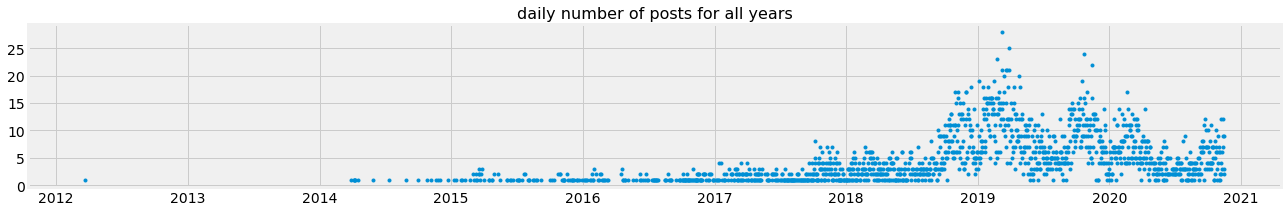

In [29]:
daily_count = df.groupby('Date').count()

plt.figure(figsize=(20,3))
plt.plot(daily_count['post_id'], marker='.', linestyle='')
# plt.xlim((pd.to_datetime('2014-07-01'), pd.to_datetime('2020-07-01')))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('daily number of posts for all years',fontsize=16)

### Weekly counts

In [30]:
df = df.set_index('Date')

Text(0.5, 1.0, 'Weekly counts of posts')

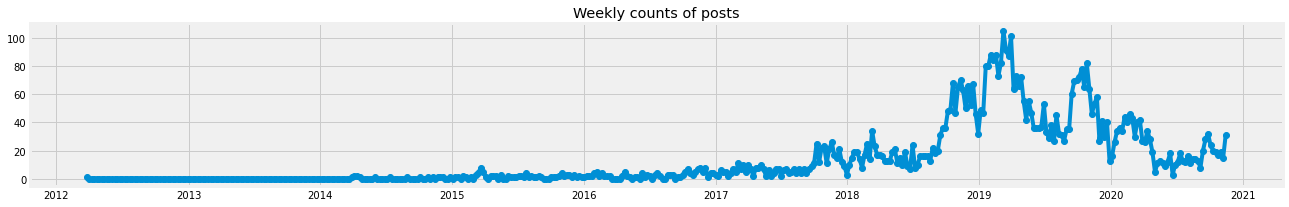

In [31]:
df_week_counts = df.groupby(pd.Grouper(freq='W')).count()

plt.figure(figsize=(20,3))
# plt.xlim((pd.to_datetime('2019-07-01'), pd.to_datetime(time.ctime())))
plt.plot(df_week_counts.index, df_week_counts.Poster, marker='o', linestyle='-')
plt.title('Weekly counts of posts')

### Monthly counts(since 2017)

Text(0.5, 1.0, 'Monthly counts of posts')

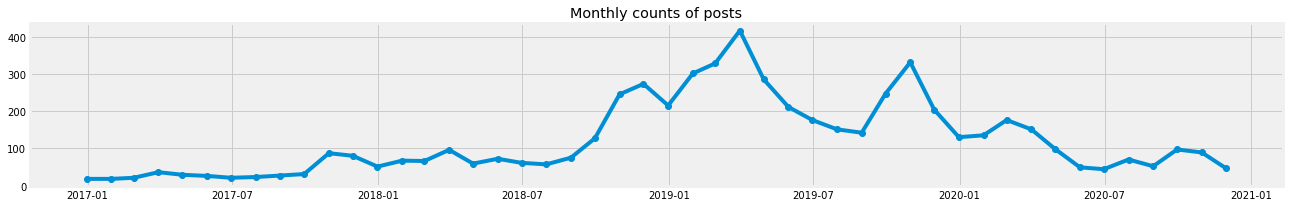

In [32]:
df_monthly_counts = df.groupby(pd.Grouper(freq='M')).count()['2016-12-24':]

plt.figure(figsize=(20,3))
plt.plot(df_monthly_counts.index, df_monthly_counts.Poster, marker='o', linestyle='-')
plt.title('Monthly counts of posts')

In [33]:
df_monthly_counts.head()

,Poster,Replies,Views,post_id,post_title,company,is_referral
Date,,,,,,,
2016-12-31,18,18,18,18,18,17,18
2017-01-31,18,18,18,18,18,15,18
2017-02-28,21,21,21,21,21,21,21
2017-03-31,36,37,37,37,37,35,37
2017-04-30,29,30,30,30,30,30,30


#### We can see that the September is the peak month in the year for companies offering opportunities.

Text(0.5, 1.0, 'Rolling averages of daily posts offering internal referrals')

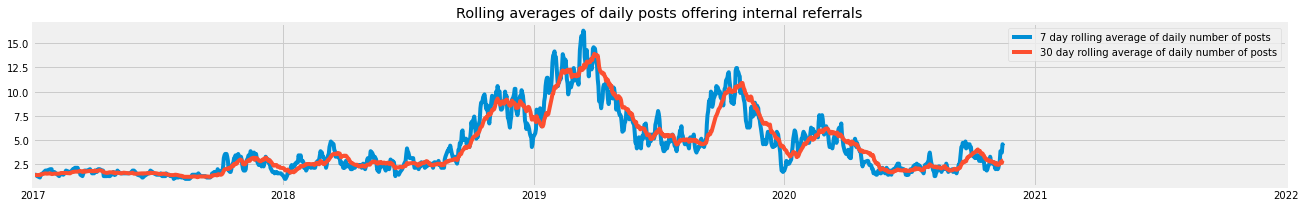

In [34]:
df_new = df.groupby('Date').count()

daily_post_avg_7 = df_new.rolling(7).mean()['Poster']
daily_post_avg_30 = df_new.rolling(28).mean()['Poster']

plt.figure(figsize=(20, 3))
plt.plot(daily_post_avg_7, label='7 day rolling average of daily number of posts')
plt.plot(daily_post_avg_30, label='30 day rolling average of daily number of posts')
plt.xlim((pd.to_datetime('2017-01-01'), pd.to_datetime('2022-01-01')))
plt.legend()
plt.title('Rolling averages of daily posts offering internal referrals')
# plt.xticks([0, 1, 2], ['January', 'February', 'March'])

##  Question 2. What are the top companies offering the largest number of referral opportunities? Have they changed over the past several years?

In [35]:
posts_per_company = df['company'].value_counts()[:20]; posts_per_company.head()

Facebook        1028
Amazon           576
Google           383
Wayfair          344
AkunaCapital     200
Name: company, dtype: int64

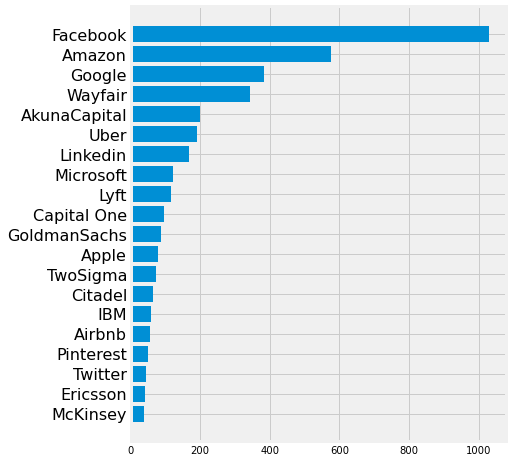

In [36]:
plt.figure(figsize=(6,8))
plt.barh(posts_per_company.index, posts_per_company.values)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()

##  Question 3. Who has the most number of posts of sharing interviews?
### Top ten author ordered by number of posts and average views

In [37]:
poster_info = df.groupby(['Poster']).agg({'Views': ['count','sum', 'mean', 'min', 'max'], 'Replies': ['mean', 'min', 'max']})
poster_info.columns = ['_'.join(x) for x in poster_info.columns.ravel()]
poster_info.sort_values(by=['Views_count', 'Views_mean'], ascending=False).head(10)

,Views_count,Views_sum,Views_mean,Views_min,Views_max,Replies_mean,Replies_min,Replies_max
Poster,,,,,,,,
Flushing小当家,31,26130,842.903226,391,2114,2.354839,0,10
victoriaoranje,16,21243,1327.687500,675,3725,2.875000,0,10
wasabimao1181,14,51173,3655.214286,1267,7351,12.357143,4,39
carrieliu,13,27189,2091.461538,873,4934,6.153846,0,18
szzz0107,13,13750,1057.692308,505,1618,4.923077,0,16
kayokocnwx,12,26952,2246.000000,665,4658,11.083333,0,28
syjiaozi,12,21259,1771.583333,468,4623,4.666667,0,18
人的一生啊,11,41850,3804.545455,1301,18870,18.181818,2,115
baca,11,38096,3463.272727,1645,6298,6.545455,2,15
